In [1]:
import pandas as pd 
import numpy as np 
from scipy.optimize import minimize 
import matplotlib.pyplot as plt 
from utiles import * 
df = pd.read_csv('ARP_Returns.csv')
df_norm, df_return = cal_return(df)

In [2]:
settings = [
            ('2009-01-01', 1, None, 'diversification_ratio'), 
            # ('2015-09-01', 1, None),
            # ('2017-09-01', 1, None),
            # ('2009-01-01', 0.1, None),
            # ('2015-09-01', 0.1, None),
            # ('2017-09-01', 0.1, None),
            # ('2009-01-01', 1, 'equity_trend'), 
            # ('2015-09-01', 1, 'equity_trend'),
            # ('2017-09-01', 1, 'equity_trend'),
            # ('2009-01-01', 0.1, 'equity_trend'),
            # ('2015-09-01', 0.1, 'equity_trend'),
            # ('2017-09-01', 0.1, 'equity_trend')
           ]

result = {} 

('2009-01-01', 1, None, 'diversification_ratio')
Wall time: 33.3 s


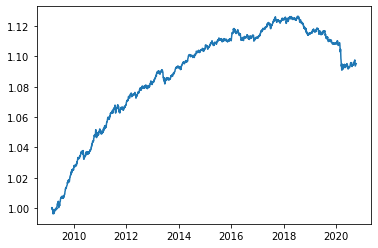

In [3]:
%%time
for config in settings:
    print(config)
    result[config] = portfolio_optimisation(df_return, 
                                            cutoff_date=config[0],
                                            upper_bound=config[1],
                                            drop_strategy=config[2],
                                            target=config[3])

In [4]:
result[config]['diversification_ratio']

3.748813896146832

In [5]:
from PortfolioPerformance import * 
return_compoent = result[config]['df_return'].set_index('Date').fillna(0)
weights = result[config]['weights'] 

In [6]:
start_date = return_compoent.index[0]
month_end_list = [start_date] + list(pd.date_range(start_date, '2020-10-01', freq='BM'))

In [7]:
strategy_list = list(return_compoent.columns[1:])
d = {strategy: weights[i] for i, strategy in enumerate(strategy_list)}
weight_component = pd.DataFrame(d, index=month_end_list)


In [8]:
weight_component.columns

Index(['equity_low_beta', 'equity_quality', 'commodity_carry',
       'commodity_curve', 'credit_curve', 'credit_carry', 'fx_carry',
       'fx_value', 'interest_rate_spread', 'interest_rate_curve',
       'equity_trend', 'fx_trend', 'commodity_trend', 'interest_rate_trend',
       'commodity_volatility_carry', 'interest_rate_volatility_carry',
       'equity_volatility_carry', 'cot', 'merger_arb'],
      dtype='object')

In [9]:
return_compoent[weight_component.columns].columns

Index(['equity_low_beta', 'equity_quality', 'commodity_carry',
       'commodity_curve', 'credit_curve', 'credit_carry', 'fx_carry',
       'fx_value', 'interest_rate_spread', 'interest_rate_curve',
       'equity_trend', 'fx_trend', 'commodity_trend', 'interest_rate_trend',
       'commodity_volatility_carry', 'interest_rate_volatility_carry',
       'equity_volatility_carry', 'cot', 'merger_arb'],
      dtype='object')

In [10]:
%%time
df_rebalanced_port = Get_Portfolio_Index(return_compoent[weight_component.columns], weight_component)

12-08 00:00:00
2016-12-09 00:00:00
2016-12-12 00:00:00
2016-12-13 00:00:00
2016-12-14 00:00:00
2016-12-15 00:00:00
2016-12-16 00:00:00
2016-12-19 00:00:00
2016-12-20 00:00:00
2016-12-21 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2016-12-26 00:00:00
2016-12-27 00:00:00
2016-12-28 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-16 00:00:00
2017-01-17 00:00:00
2017-01-18 00:00:00
2017-01-19 00:00:00
2017-01-20 00:00:00
2017-01-23 00:00:00
2017-01-24 00:00:00
2017-01-25 00:00:00
2017-01-26 00:00:00
2017-01-27 00:00:00
2017-01-30 00:00:00
2017-01-31 00:00:00
2017-02-01 00:00:00
2017-02-02 00:00:00
2017-02-03 00:00:00
2017-02-06 00:00:00
2017-02-07 00:00:00
2017-02-08 00:00:00
2017-02-09 00:00:00
2017-02-10 00:00:00
2017-02-13 00:00:00
2017-02-14 00:00:00
2017-02-15 00:00:00
2017-

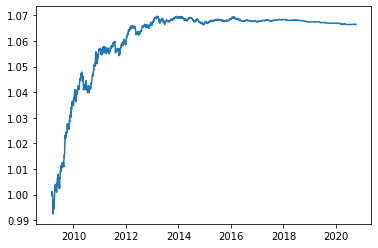

In [11]:
plt.plot(df_rebalanced_port['portfolio_index']/1000)

In [12]:
weight_component.tail()

,equity_low_beta,equity_quality,commodity_carry,commodity_curve,credit_curve,credit_carry,fx_carry,fx_value,interest_rate_spread,interest_rate_curve,equity_trend,fx_trend,commodity_trend,interest_rate_trend,commodity_volatility_carry,interest_rate_volatility_carry,equity_volatility_carry,cot,merger_arb
2020-05-29,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2020-06-30,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2020-07-31,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2020-08-31,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2020-09-30,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299


In [13]:
weight_component.head()

,equity_low_beta,equity_quality,commodity_carry,commodity_curve,credit_curve,credit_carry,fx_carry,fx_value,interest_rate_spread,interest_rate_curve,equity_trend,fx_trend,commodity_trend,interest_rate_trend,commodity_volatility_carry,interest_rate_volatility_carry,equity_volatility_carry,cot,merger_arb
2009-03-04,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2009-03-31,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2009-04-30,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2009-05-29,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299
2009-06-30,0.017637,0.088702,0.100291,0.00261,0.033754,0.113292,0.045454,0.021559,0.043675,0.205454,0.064237,0.024625,0.029788,0.01487,0.024025,0.009263,0.012995,0.015875,0.101299


In [14]:
return_compoent.tail()

,equity_momentum,equity_low_beta,equity_quality,commodity_carry,commodity_curve,credit_curve,credit_carry,fx_carry,fx_value,interest_rate_spread,interest_rate_curve,equity_trend,fx_trend,commodity_trend,interest_rate_trend,commodity_volatility_carry,interest_rate_volatility_carry,equity_volatility_carry,cot,merger_arb
Date,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.001819,-0.000524,-0.000400,0.000895,-0.002720,0.000224,0.000992,0.003086,-0.000082,-0.000007,-0.000128,0.000529,-0.000048,0.007453,0.000028,-0.006350,0.000374,-0.001088,0.000322,0.000365
2020-10-02,0.001069,0.000943,-0.000401,0.003729,0.000673,-0.000124,-0.001201,0.001687,0.003526,-0.000004,0.000402,-0.001489,0.000796,0.011414,-0.000091,-0.005357,-0.000637,0.001448,-0.000719,-0.000843
2020-10-05,0.000747,-0.000524,-0.000501,-0.005273,0.000701,0.000171,0.000679,-0.001258,-0.002114,-0.000065,0.001769,0.001982,0.003758,-0.015691,-0.000146,0.000968,-0.002314,0.001627,0.001163,-0.000549
2020-10-06,0.000960,0.000000,0.001001,-0.005117,0.000466,0.000023,-0.000300,-0.000818,0.001250,-0.000105,-0.000466,-0.002142,-0.003301,-0.008579,-0.000211,0.000922,0.001324,0.003692,-0.000178,0.001015
2020-10-07,0.000427,0.000524,0.000500,0.000633,-0.000757,0.000384,-0.000113,0.000692,-0.001678,-0.000106,0.000952,0.001210,0.000884,0.009452,-0.000690,-0.000635,-0.001643,0.001439,-0.002496,0.002147
